In [2]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


## 첫 번째 머신러닝 만들기 - 붗꽃 품종 예측하기

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
#붓꽃 데이터 세트를 로딩
iris = load_iris()

#iris.data는 iris 데이터셋에서 피쳐(feature)만으로 된 데이터를 numpy로 가지고 있다
iris_data = iris.data

#iris.target은 붓꽃 데이터셋에서 레이블(결정 값) 데이터를 numpy로 가지고 있다
iris_label = iris.target

print('iris target 값:', iris_label)
print('iris target 명:', iris.target_names)

#붓꽃 데이터셋을 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.head(3)

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


피쳐에는 sepal length, sepal width, petal length, petal width가 있고
레이블은 (0,1,2)로 나누어져 있다

train_test_split()  
-test_size : 전체 데이터에서 테스트 데이터셋 크기를 얼마로 샘플링할지 결정, 기본값 = 0.25  
-train_size : 전체 데이터에서 학습용 데이터셋 크기를 얼마로 샘플링할지 결정  
-shuffle : 데이터를 분리하기 전에 미리 섞을지 결정, 기본값 = True  
-random_state : 난수 값 지정  
-train_test_split()의 반환값은 튜플 형태  
-*학습데이터의 피처 데이터 셋, 테스트데이터의 피처 데이터 셋, 학습데이터의 레이블 데이터셋, 테스트데이터의 레이블 데이터셋이 반환*

In [5]:
#학습용 데이터와 테스트용 데이터 분리
#train_test_split()
#학습데이터와 테스트데이터를 test_size파라미터 입력값의 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=11)

#데이터와 레이블을 둘 다 넣었을 경우 반환
#데이터만 넣었을 경우 X_train, X_test로 반환
#X_train: 학습용 피처 데이터셋
#X_test: 테스트용 피쳐 데이터셋
#y_train: 학습용 레이블 데이터셋
#y_test: 테스트용 레이블 데이터셋

의사 결정 트리 클래스를 이용해 학습과 예측 수행

In [6]:
#DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

In [7]:
#학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [8]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 셋으로 예측 수행
pred = dt_clf.predict(X_test)

In [9]:
#accuracy_score(): 정확도 측정
#accuracy_score(실제 레이블 데이터셋, 예측 레이블 데이터셋)
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


붓꽃 데이터셋 예측 과정
1. 데이터셋 분리
2. 모델 학습
3. 예측 수행
4. 평가

In [10]:
from sklearn.datasets import load_iris
#사이킷런에 내장된 데이터셋은 일반적으로 딕셔너리 형태
iris_data = load_iris()
print(type(iris_data))
#Bunch클래스는 딕셔너리 자료형과 유사

<class 'sklearn.utils._bunch.Bunch'>


In [11]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


load_iris()가 반환하는 객체의 키인 feature_names, target_name, data, target이 가리키는 값을 다음 예제 코드에 출력

In [12]:
print('\n feature_names의  type:', type(iris_data.feature_names))
print(' feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_name의  type:', type(iris_data.target_names))
print(' target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의  type:', type(iris_data.data))
print(' data의 shape:', len(iris_data.data))
print(iris_data.data)

print('\n target의  type:', type(iris_data.target))
print(' targer의 shape:', len(iris_data.target))
print(iris_data.target)


 feature_names의  type: <class 'list'>
 feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_name의  type: <class 'numpy.ndarray'>
 target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의  type: <class 'numpy.ndarray'>
 data의 shape: 150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 

*train_test_split(): 학습/데이터셋 분리*

In [13]:
#학습데이터셋으로만 학습하고 예측하면 무엇이 문제일까?
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

#학습 데이터셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

#이미 학습한 데이터셋을 기반으로 예측했기 떄문에 정확도가 1.0이 나온다

예측 정확도: 1.0


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.3, random_state = 121)

In [15]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 크기:', features.shape[0])

붓꽃 데이터 크기: 150


In [17]:
#kfold 교차검증
n_iter = 0

# KFold객체의 split( )을 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환한다
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter +=1 
    #반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print(f'\n #{n_iter} 교차 검증 정확도 : {accuracy}, 학습 데이터 크기: {train_size}, 검증 데이터 크기: {test_size}')
    print(f' #{n_iter} 검증 세트 인덱스: {test_index}')

    cv_accuracy.append(accuracy)

#개별 iteration 별 정확도 합하여 평균 정확도 계산
print(f'\n ## 평균 검증 정확도:', np.mean(cv_accuracy))


 #1 교차 검증 정확도 : 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
 #1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

 #2 교차 검증 정확도 : 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
 #2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

 #3 교차 검증 정확도 : 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
 #3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

 #4 교차 검증 정확도 : 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
 #4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

 #5 교차 검증 정확도 : 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
 #5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 ## 평균 검증 정확도: 0.9


### stratified K폴드  
stratified K 폴드는 불균형햔 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K폴드 방식이다 \
불균형한 분포도를 가진 레이블 데이터 집합: 특정 레이블 값이 특이하게 많거나 적어서 값의 분포가 한쪽으로 치우치는 것 \
K폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 줌

In [18]:
#kpold가 어떤 문제를 가지고 있을까?
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [19]:
#원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못함
#이슈가 발생하는 현상을 도출하기 위해 3개의 폴드세트를 KFold로 생성하고 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값 분포도 확인
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f' ## 교차 검증: {n_iter}')
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
#교차 검증시마다 학습레이블과 검증레이블이 완전히 다른값으로 추출됨
#첫번째 케이스의 경우 학습 레이블은 1,2밖에 없으므로 학습 모델은 0을 예측할 수 없다

 ## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
 ## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
 ## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


-stratifiedKFold 사용해 학습, 검증 레이블 데이터의 분포도 확인  
-stratifiedKFold는 분할된 레이블 데이터셋이 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 줌  
-stratifiedKFold: split()메서드의 인자로 피쳐데이터 뿐만 아니라 레이블 데이터 세트도 반드시 필요  
-why? stratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문  

In [20]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f' ##{n_iter}:')
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
#학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됨
#전체 150개에서 학습으로 100개, 검증으로 50개가 교차 검증 단계별로 할당
#첫번째 교차검증에서 레이블 0,1,2는 각각 34 33 33개로 레이블 값별로 거의 동일하게 할당
#이렇게 분할이 되어야 레이블 0,1,2를 모두 학습할 수 있고, 이에 기반해 검증 수행 가능

 ##1:
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
 ##2:
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
 ##3:
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [21]:
dt_clf = DecisionTreeClassifier(random_state = 156)
skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

#StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    #반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'\n#{n_iter} 교차 검증 정확도 : {accuracy}, 학습 데이터 크기 : {train_size}, 검증 데이터 크기 : {test_size}')
    print(f'#{n_iter} 검증 세트 인덱스: {test_index}')
    cv_accuracy.append(accuracy)

#교차 검증 별 정확도 및 평균 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('\n## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]

## 평균 검증 정확도: 0.9667


### cross_val_score()  
KFold로 데이터를 학습하고 예측하는 코드 과정
1. 폴드 세트를 정하고
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤
3. 반복적으로 예측을 수행하고 예측 성능을 반환

cross_val_score()은 이런 과정을 한꺼번에 수행해주는 API

In [22]:
#cross_val_score()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data #피처 데이터셋
label = iris_data.target #레이블 데이터셋

#성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
#cross_val_score()의 주요 파라미터
#estimator(dt_clf) : classifier or regressor
#x(data): 피처 데이터 세트
#y(label): 레이블 데이터 세트
#scoring('accuracy'): 예측 성능 평가 지표
#cv(3): 교차 검증 폴드 수

print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))
#cross_val_score()는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환
#그리고 일반적으로 이를 평균해 평가 수치로 사용

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


GridSearchCV : 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에 수행  
사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다

In [23]:
#결정트리알고리즘 최고 성능 가지는 파라미터 조합 찾기
grid_parameters = {'max_depth': [1,2,3],
                   'min_samples_split': [2,3]
                  }
#(1,2), (1,3), (2,2), (2,3), (3,2), (3,3) 총 6회 실행하면서 최적의 파라미터와 수행결과 도출

GridSearchCV는 데이터셋을 cross-validation을 위한 학습/데이터 세트로 자동으로 분할한 뒤 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾는다  
수행시간이 상대적으로 오래 걸리는 것에 유념

GridSearchCV의 주요 파라미터  
-estimator : classifier, regressor, pipeline  
-param_grid : key + 리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정  
-scoring : 예측 성능을 측정할 평가 방법 지정  
-cv : 교차 검증을 위해 분할되는 학습/테스트 셋의 개수 지정  
-refit : 디폴트가 True이며 True로 생성 시 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator객체를 해당 하이퍼 파라미터로 재학습시킴

In [24]:
#train_test_split()으로 데이터셋을 분리하고
#GridSearchCV를 이용해 최적의 파라미터 추출
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

##파라미터를 딕셔너리 형태로 저장
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}

In [25]:
import pandas as pd
#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
## refit = True가 디폴트, True이면 가장 좋은 파라미터 설정으로 재학습
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)
#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]
#총 6개의 결과 확인
#params칼럼: 적용된 개별 하이퍼 파라미터값
#rank_test_score: 하이퍼 파라미터별로 성능이 좋은 score순위를 나타냄
#mean_test_score: 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


GridSearchCV의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록

In [26]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))
#max_depth가 3, min_samples_split이 2일때 평균 최고 정확도 0.9750 측정

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


refit = True이면 최적 성능을 내는 하이퍼 파라미터로 estimator를 학습해 best_estimator로 저장

In [27]:
#학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))
#일반적으로 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤 별도의 테스트 세트에서 이를 평가하는 것이 일반적

테스트 데이터 세트 정확도 : 0.9667


### 데이터 전처리  
결손값 처리 문제,  
사이킷런의 머신러닝 알고리즘은 문자열 값을 허용하지 않음  
-> 모든 문자열 값은 인코딩돼서 숫자형으로 변환해야 함

#### 데이터 인코딩
##### 레이블 인코딩 : 카테고리형 피처를 코드형 숫자 값으로 변환  
ex) TV:1, 냉장고:2, 전자레인지:3 과 같은 숫자형 값으로 변환  
LabelEncoder 클래스로 구현

In [28]:
from sklearn.preprocessing import LabelEncoder
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#LabelEncoder를 객체로 생성한 후 fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)
#tv 0, 냉장고 1, 전자레인지 4, 컴퓨터 5, 선풍기 3, 믹서 2로 변환

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [29]:
#인코딩 파악
print('인코딩 클래스', encoder.classes_)

인코딩 클래스 ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [30]:
#classes 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있다
#inverse_transform()을 통해 인코딩된 값을 다시 디코딩
print('인코딩 원본값', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 원본값 ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다  
하지만 레이블 인코딩이 일괄적인 숫자값으로 변환되면서 숫자 값의 크고 작음에 의해 몇몇 알고리즘에서는 예측 성능이 떨어지는 경우가 발생할 수 있다  
냉장고가 1, 믹서기가 2로 변환되면 1보다 2가 크기 때문에 특정 머신러닝 알고리즘에서 가중치가 더 부여되거나 중요하게 인식될 수 있다  
이 때문에 트리 계열의 알고리즘은 상관없으나 회귀 같은 알고리즘에는 적용하지 않아야 한다  

##### 원-핫 인코딩
레이블 인코딩의 문제점을 해결하기 위한 인코딩 방법  
피처값의 유형에 따라 새로운 피처를 추가해 *고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식*  
즉, *행 형태로 되어 있는 피처의 고유 값을 열 형태로 차원변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다*  

0부터 5까지 6개의 상품분류 고유값에 따라 상품분류피처를 6개의 상품분류 고유 값 피처로 변환  
해당 레코드가 TV인 경우에는 상품분류_TV 피처에만 1을 입력하고 나머지 피처는 모두 0으로 입력  

원-핫 인코딩 시 주의사항  
입력값으로 2차원 데이터가 필요  
OneHotEncoder를 이용해 변환한 값이 희소행렬(Sparse Matrics) 형태이므로 이를 다시 toarray()를 이용해 밀집 행렬(Dense Matrix)로 변환해야 함  

In [31]:
from sklearn.preprocessing import OneHotEncoder 
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

#원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

#OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


판다스의 get_dummies()를 이용하면 원-핫 인코딩을 더 쉽게 수행할 수 있다  
OneHotEncoder와 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요가 없다

In [32]:
import pandas as pd
df = pd.DataFrame({'items' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', 
                              '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


### 피처 스케일링과 정규화
피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업  
대표적인 방법으로 표준화(Standardization), 정규화(Normalization)가 있다

표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것  
xi_new = (xi - mean(x)) / stdev(x)  

정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념  
개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것  
xi_new = (xi - min(x)) / max(x) - min(x)

사이킷런의 정규화는 일반적인 정규화와 차이가 있다  
사이킷런의 정규화는 선형대수학에서의 정규화 개념이 사용되었다  
개별 벡터를 모든 피처 벡터의 크기로 나누어 준다  
xi_new = xi / sqrt(xi**2 + yi**2 + zi**2)

#### StandardScaler
표준화를 지원하기 위한 클래스  
개별 피처를 평균0, 분산1인 값으로 변환  
RBf커널을 이용하는 서포트벡터머신, 선형회귀, 로지스틱회귀에 적용 시 예측 성능 향상에 중요 요소가 될 수 있음  

In [33]:
from sklearn.datasets import load_iris
import pandas as pd
#붓꽃 데이터셋을 로딩하고 DF로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [34]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터셋 변환, fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터셋이 ndarray로 반환돼 이를 DF로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

#모든 칼럼 값의 평균이 0에 가까운 값으로, 분산은 1에 가까운 값으로 변환됐음을 확인

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### MinMaxScaler
데이터값을 0과 1 사이의 범위값으로 변환(음수값이 있으면 -1에서 1값으로 변환)  
데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max scale 적용해 볼 수 있다

In [35]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 셋이 ndarray로 반환돼 이를 DF로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('feature들의 최댓값')
print(iris_df_scaled.max())

#모든 피처에 0과 1 사이의 값으로 변환되는 스케일링 적용 확인

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### 학습데이터와 테스트데이터 스케일링 변환 시 유의점
일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정, transform()은 이렇게 설정된 정보를 이용해 데이터를 변환하고, fit_transform()은 이 둘을 한 번에 적용하는 기능을 수행한다  
그러나 Scale 객체를 이용해 학습데이터로 fit()과 transform()을 적용하면 테스트데이터로는 다시 fit()을 수행하지 않고 학습 데이터세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다  
즉 학습데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트데이터에 적용해야 한다

In [36]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습데이터는 0부터 10까지, 테스트데이터는 0부터 5까지의 값을 가지는 데이터세트로 생성
#Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [37]:
#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환. 원본 10->1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale 된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale 된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [38]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


학습데이터는 원본값 2가 0.2로, 테스트데이터는 원본값 1이 0.2로 변환됨  
이렇게 되면 학습데이터와 테스트데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래  
머신러닝 모델은 학습 데이터를 기반으로 하기 때문에 테스트데이터는 학습데이터의 스케일링 기준에 따라야 한다  
따라서 *테스트데이터에 다시 fit()을 적용해서는 안되며 학습데이터로 이미 fit()이 적용된 Scaler객체를 이용해 transform()으로 변환해야 함*

In [39]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

#학습데이터와 테스트데이터 모두 동일하게 변환되었음을 확인

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


이렇게 fit()과 transform()을 적용할 때 주의사항이 발생하므로 *전체데이터세트에 스케일링을 적용한 후 학습/테스트 데이터로 나누는 것이 바람직*

## 타이타닉 생존자 예측

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [88]:
#데이터 칼럼 타입 확인
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Rangeindex : 데이터프레임 인덱스 범위를 알려줌, 전체 행 수 확인 가능  
Age, cabin, Embarked 칼럼은 각각 177개, 608개, 2개의 Null값을 가지고 있다  
Null값을 어떻게 처리해야 할지 결정

In [89]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())
#데이터세트에서 Null값을 없앰

데이터 세트 Null 값 개수  0


In [90]:
#문자열 피처
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print(' \n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print(' \n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64
 
 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
 
 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [91]:
#Cabin의 경우 속성값이 제대로 정리돼있지 않음
#Cabin의 앞 문자만 추출하여 사용
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


데이터 탐색

In [92]:
#성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

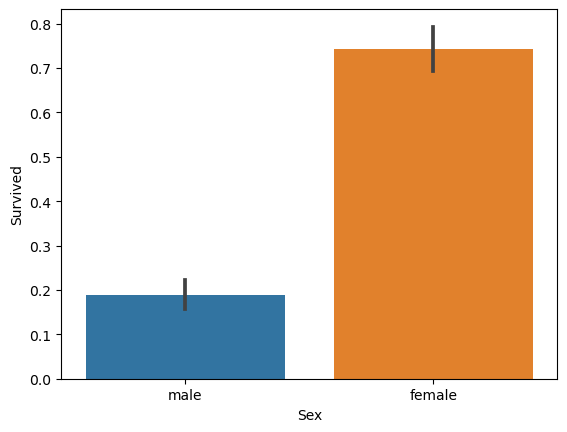

In [93]:
#시각화
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

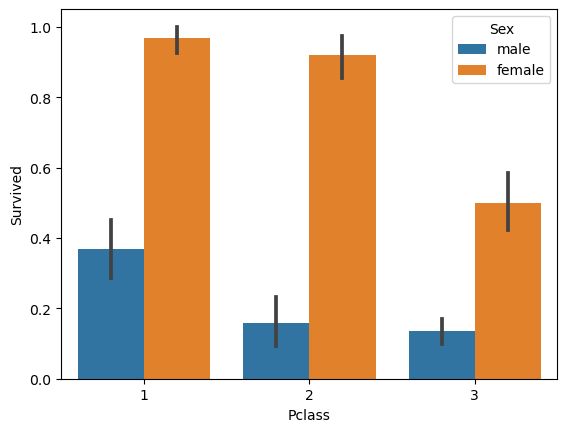

In [94]:
#객실 등급에 따른 생존확률 비교
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

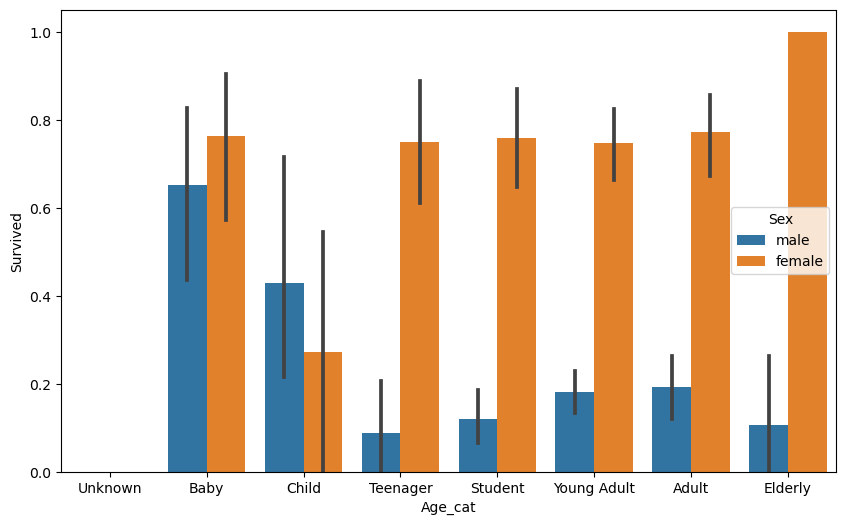

In [95]:
#Age에 따른 생존 확률
#0~5: Baby, 6~12: Child, 13~18: Teenager, 19~25: Student,
#26~35: Young Adult, 36~60: Adult, 61~: Elderly, -1이하 오류: Unknown

#입력 age에 따라 구분 값을 반환하는 함수 설정
#DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

#막대그래프 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#X축 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda 식의 위에서 생성한 get_category() 함수를 반환값으로 지정
#get_category(X)는 입력값으로 'Age'칼럼 값을 받아서 해당하는 cat반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [96]:
#남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
#LabelEncoder 클래스를 이용해 레이블인코딩 적용
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [97]:
#지금까지 사용한 가공한 내역을 정리하고 함수로 만들어 재사용할 수 있도록 하기
#null 처리함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df
#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    return df
#래이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [98]:
#원본 데이터를 재로딩하고 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('titanic_train.csv') 
y_titanic_df = titanic_df['Survived'] 
X_titanic_df = titanic_df.drop('Survived', axis = 1) #Survived 속성을 드롭해 피처 데이터 세트 만들기

X_titanic_df = transform_features(X_titanic_df) #데이터 가공

In [99]:
#테스트 데이터 세트 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

### 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측  
결정트리 : DecisionTreeClassifier  
랜덤포레스트 : RandomForestClassifier  
로지스틱회귀 : LogisticRegression  

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear') #로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정

#DecisiomTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifire 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


### 교차검증 수행
KFold, cross_val_score(), GridSearchCV() 사용

In [105]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    #폴드 세트가 5개인 KFold객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 생성
    kfold = KFold(n_splits = folds)
    scores = []

    #KFold 교차검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    #5개 폴드에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

#exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

#평균 정확도 : 0.7823

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도: 0.7823


In [109]:
#cross_val_score() 이용해 교차검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

#cross_val_score()는 stratifiedKFold를 이용해 폴드세트를 분할하기때문에 정확도가 약간 다름

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [110]:
#GridSearchCV를 이용해 최적의 하이퍼파라미터를 찾고 예측 성능 측정
#CV는 5, 하이퍼파라미터는 max_depth, min_samples_split, min_samples_leaf를 변경하며 학습 측정
#최적의 하이퍼파라미터와 예측을 출력하고 최적의 하이퍼파라미터로 학습된 Estimator를 이용해 예측 수행
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2,3,5,10],
              'min_samples_split': [2,3,5],
              'min_samples_leaf': [1,5,8]
             }
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)

accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
